# Tarea 3
## Estudiante Janneth Eulalia Calderón Peña
### Métodos Estocásticos
### Maestría en Recursos Hidráulicos
Importanto las Librerias

In [823]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import special

In [824]:
print (f'version pandas{pd.__version__}')
print (f'version numpy{np.__version__}')
print (f'version matplotlib{matplotlib.__version__}')

version pandas2.2.0
version numpy1.26.3
version matplotlib3.8.2


In [825]:
df = pd.read_csv("SMWR_2024_Ex_03.txt", sep="\t") #el \t es el separador de cada columna
display (df)

,Año,Caudal Máximo Diario Anual (m3/s)
0,1950,1266
1,1951,1492
2,1952,1862
3,1953,861
4,1954,715
5,1955,1367
6,1956,1837
7,1957,1429
8,1958,1429
9,1959,1261


In [826]:
df.rename (columns={'Caudal Máximo Diario Anual (m3/s)':'QmaxAnual'}, inplace=True)

In [827]:
df

,Año,QmaxAnual
0,1950,1266
1,1951,1492
2,1952,1862
3,1953,861
4,1954,715
5,1955,1367
6,1956,1837
7,1957,1429
8,1958,1429
9,1959,1261


Ecuacion de Von Neuman para independencia
$$
Q =\frac{\sum_{i=1}^{n-1}(x_{i+1}-x_i)^2}{\sum_{i=1}^{n} (x_i-\bar{x})^2}
$$

In [828]:
x = df['QmaxAnual'].values
x

array([1266, 1492, 1862,  861,  715, 1367, 1837, 1429, 1429, 1261, 1607,
       2132, 1652, 1537, 1155, 1899, 1956, 1596, 1380,  745, 2181,  955,
       1007,  824, 1271, 1044,  597, 1216, 1061, 1450, 2016, 1270, 1341,
       1075, 2482,  874, 1689, 1554, 1831, 1149, 1444, 1791, 1207, 3050,
       1578, 2817,  792, 1143, 1698, 2076, 1204, 1835], dtype=int64)

In [829]:
x.shape

(52,)

In [830]:
sumanumerador=0
sumadenominador=0
mean=np.mean(x)
for i in range(len(x)-1):
    sumanumerador=sumanumerador+(x[i+1]-x[i])**2
for i in range(len(x)):               
    sumadenominador=sumadenominador+(x[i]-mean)**2
resultado=sumanumerador/sumadenominador
print (resultado)

2.1541108274866954


Teniendo en cuenta que para $n=52$ y una significancia $\alpha=0.05$ el valor critico para la hipotesis nula es 1.55
el resultado es mayor siendo 2.15, por tanto se niega la hipotesis nula que afirma que las muestras no son independientes, por tanto, las muestra son independientes

2. Pruebe si se puede detectar una tendencia.
   
Para identificar la existencia de tendencia se utiliza el test de **Mann-Kendall** cuya ecuacion es:

$$
S=\sum_{i=1}^{n-1}\sum_{j=i+1}^{n}sig(x_j-x_i)
$$
Si el estadistico es positivo se infiere una tendencia creciente, si por el contrario es negativo se infiere una tendencia decreciente, en consecuencia si S = 0 no hay tendencia.

Una vez obtenido el estadistico se calcula la varianza para luego normalizar:
$$
Var(S) = \frac{n(n-1)(2n+5)}{18}
$$
Generando el nuevo estadistico Z como:


$$
Z = 
\begin{cases} 
    \frac{S-1}{Var(S)^{1/2}}& \text{si } S>0 \\
    0  &\text {si S = 0} \\
    \frac{S+1}{Var(S)^{1/2}}& \text {si }  S<0
\end{cases}
$$
El valor critico para un nivel de significancia $\alpha=0.05$ es igual 1.96 que es para una distribucion normal

In [831]:
s=0
k=0
for k in range (0,len(x)-1,1):
    for j in range(k+1,len(x),1):
        s=s+np.sign(x[j]-x[k])
s   

107

In [832]:
n=len(x)
VarS=n*(n-1)*(2*n+5)/18
VarS

16059.333333333334

In [833]:
Z=(s-1)/VarS**0.5
Z

0.836454089830223

Teniendo en cuenta que el valor critico es 1.96, y Z=0.83 se asimila la hipotesis nula, es decir, No hay tendencia

3. Grafique los datos en papel de probabilidad Gumbel y determina los parámetros de la distribución Gumbel. 
¿Cuál es la estimación de la inundación de 1000 años? 

Para graficar los datos en una distribución de Gumbel, en primer lugar se debe organizar de menor a mayor y calcular su Distribución Acumulada de Probabilidad (CDF)

In [834]:
datos_organizados=np.sort(x)
datos_organizados

array([ 597,  715,  745,  792,  824,  861,  874,  955, 1007, 1044, 1061,
       1075, 1143, 1149, 1155, 1204, 1207, 1216, 1261, 1266, 1270, 1271,
       1341, 1367, 1380, 1429, 1429, 1444, 1450, 1492, 1537, 1554, 1578,
       1596, 1607, 1652, 1689, 1698, 1791, 1831, 1835, 1837, 1862, 1899,
       1956, 2016, 2076, 2132, 2181, 2482, 2817, 3050], dtype=int64)

In [835]:
rango=x.max()-x.min() #rango de los datos
rango

2453

In [836]:
#tamaño del bin
bins=25 #numero de bins
tamano_bin= rango/bins
tamano_bin

98.12

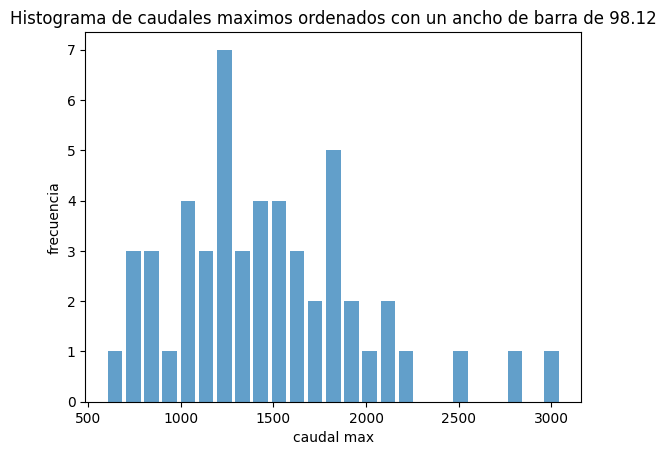

In [837]:
plt.hist(datos_organizados,bins=bins,alpha=0.7, rwidth=0.8)
plt.ylabel('frecuencia')
plt.xlabel('caudal max')
plt.title(f'Histograma de caudales maximos ordenados con un ancho de barra de {tamano_bin}')
plt.show()

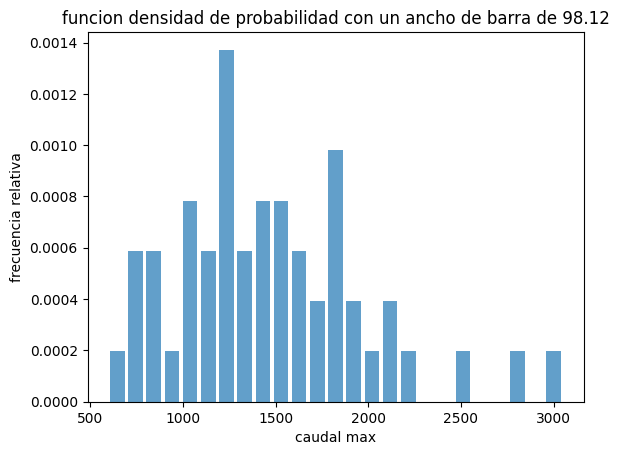

In [838]:
cantidad_datos=len(x)
plt.hist(datos_organizados,bins=bins,alpha=0.7, rwidth=0.8,density=True)
plt.ylabel('frecuencia relativa')
plt.xlabel('caudal max')
plt.title(f'funcion densidad de probabilidad con un ancho de barra de {tamano_bin}')
plt.show()

A continuacion se calcula la distribucion acumulada para cada dato

In [839]:
puntos_distri_acum=[]
for i in datos_organizados:
    probabilidad_acum=(datos_organizados<=i).sum()/len(x)
    puntos_distri_acum.append((probabilidad_acum))
    
puntos_distri_acum=np.array(puntos_distri_acum)
puntos_distri_acum

array([0.01923077, 0.03846154, 0.05769231, 0.07692308, 0.09615385,
       0.11538462, 0.13461538, 0.15384615, 0.17307692, 0.19230769,
       0.21153846, 0.23076923, 0.25      , 0.26923077, 0.28846154,
       0.30769231, 0.32692308, 0.34615385, 0.36538462, 0.38461538,
       0.40384615, 0.42307692, 0.44230769, 0.46153846, 0.48076923,
       0.51923077, 0.51923077, 0.53846154, 0.55769231, 0.57692308,
       0.59615385, 0.61538462, 0.63461538, 0.65384615, 0.67307692,
       0.69230769, 0.71153846, 0.73076923, 0.75      , 0.76923077,
       0.78846154, 0.80769231, 0.82692308, 0.84615385, 0.86538462,
       0.88461538, 0.90384615, 0.92307692, 0.94230769, 0.96153846,
       0.98076923, 1.        ])

In [840]:
type(puntos_distri_acum)

numpy.ndarray

Determinacion de los parametro de Gumbel utilizando una linea recta como si estuviese graficada en papel de Gumbel para lo cual se debe aplicar a los valores de distribucion acumulada el $ln(-ln(pa)) $, donde pa es la probabilidad acumulada

In [841]:
def y_Gumbel(pa):
    lnpa=np.log(1/pa)
    lnlnpa=-np.log(lnpa)
    return lnlnpa

In [842]:
y=y_Gumbel(puntos_distri_acum)
y

C:\Users\leomo\AppData\Local\Temp\ipykernel_111436\3368349698.py:3: RuntimeWarning: divide by zero encountered in log
  lnlnpa=-np.log(lnpa)


array([-1.37403039, -1.18114314, -1.04824188, -0.94193873, -0.85092234,
       -0.76986942, -0.69581042, -0.6269017 , -0.56190981, -0.499962  ,
       -0.44041289, -0.3827675 , -0.32663426, -0.27169475, -0.21768349,
       -0.16437395, -0.11156854, -0.05909117, -0.00678169,  0.04550854,
        0.09792017,  0.15058889,  0.20364795,  0.25723061,  0.3114723 ,
        0.42249909,  0.42249909,  0.47958667,  0.53794353,  0.59775276,
        0.65921637,  0.72255989,  0.7880379 ,  0.85594099,  0.92660459,
        1.0004205 ,  1.07785187,  1.15945347,  1.24589932,  1.33802142,
        1.43686517,  1.54377143,  1.66050174,  1.78943766,  1.93391379,
        2.09880932,  2.29168356,  2.52519494,  2.82306685,  3.23855027,
        3.94155039,         inf])

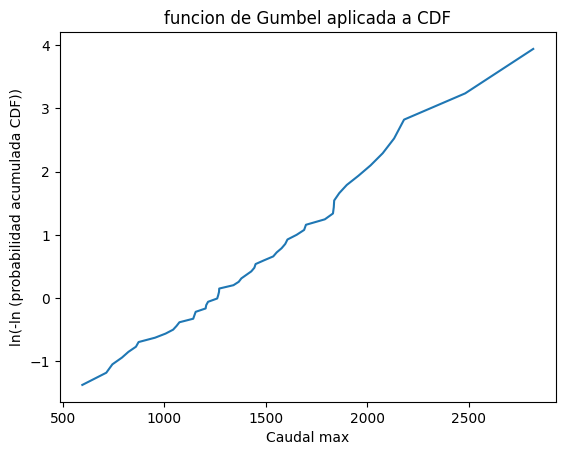

In [843]:
plt.plot(datos_organizados,y)
plt.ylabel('ln(-ln (probabilidad acumulada CDF))')
plt.xlabel('Caudal max')
plt.title(f'funcion de Gumbel aplicada a CDF')
plt.show()

obtencion de los parametros Gumbel donde

$$
m=1/\beta
\text{ y } b= -\mu/\beta
$$

con m como la pendiente, y b el intercepto con el eje y

como $m= (y_1-y_0)/x_1-x_0) \text { y } b= y_0$

Recta de regresion lineal con la funcion regplot de seaborn

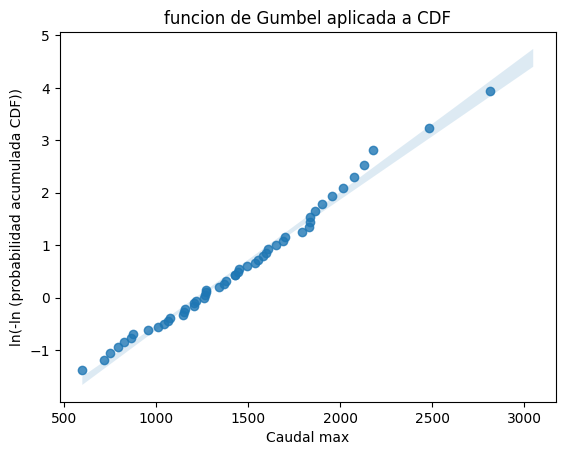

In [844]:
ax = sns.regplot(x=datos_organizados, y=y)
plt.ylabel('ln(-ln (probabilidad acumulada CDF))')
plt.xlabel('Caudal max')
plt.title(f'funcion de Gumbel aplicada a CDF')
plt.show()

tomando el intervalo 1000 a 1500 donde la grafica presenta un comportamiento lineal aceptable entonce escogen valores de x y y entre este intervalo para calcular la pendiente $x_0=1007 \text{ y } x_1=1380$

In [845]:
x1=datos_organizados[8]
y1=y[8]
x2=datos_organizados[24]
y2=y[24]
m=(y2-y1)/(x2-x1)
m

0.0023415070000979057

ahora extrapolando la recta con una regla $b\approx -2.3$

Recordando:
$$
m=1/\beta
\text { y }
b= -\mu/\beta
$$

Despejando 
$$
\beta=1/m
\text{ y }
\mu=-b*\beta
$$

In [846]:
beta = 1/m
beta

427.07538348516016

In [847]:
mu = -(-2.3)*beta
mu

982.2733820158683

construccion de la funcion de densidad de probabilidad de Gumbel

In [848]:
def gumbel_pdf(x,mu,beta):
    z=(x-mu)/beta
    pdf=(1/beta)*np.exp(-z-np.exp(-z))
    return pdf

In [849]:
xpoint=np.linspace(-500,3000,100)
ypoint=gumbel_pdf(xpoint,mu,beta)

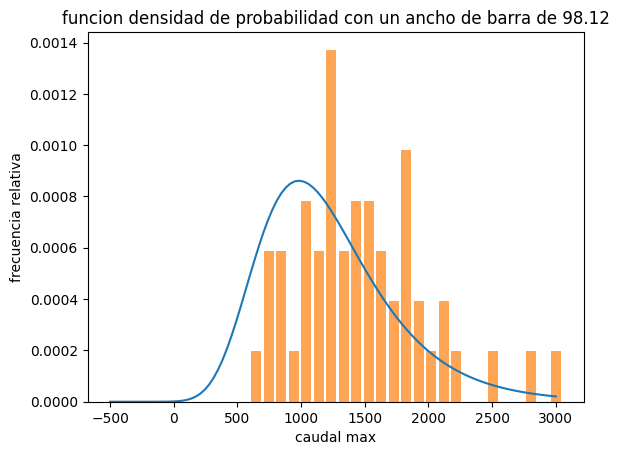

In [850]:
plt.plot(xpoint,ypoint)
cantidad_datos=len(x)
plt.hist(datos_organizados,bins=bins,alpha=0.7, rwidth=0.8,density=True)
plt.ylabel('frecuencia relativa')
plt.xlabel('caudal max')
plt.title(f'funcion densidad de probabilidad con un ancho de barra de {tamano_bin}')
plt.show()

como se puede observar de la figura anterior la funcion de densidad construida con los parametros obtenidos de la linealizacion de la funcion de distribucion de probabilidad acumulada

para el periodo de retorno tenemos:
$$
1/T=P(x>=x_t)=1-F(x_t)
$$
$$
F(x_t)=\frac{T-1}{T}
$$
$$
y_t= -ln(ln(\frac{T}{T-1}))
$$
$$
x_t=\mu+(\beta*y_t)
$$
entonces:

In [851]:
T=1000
y_t=-np.log(np.log(T/(T-1)))
y_t

6.907255070523628

In [852]:
x_t=mu+(beta*y_t)
x_t

3932.1919900895637

por tanto el caudal con periodo de retorno de 1000 años es $3932.9m^3/s$

4.Determine los parámetros de la distribución Gumbel mediante regresión lineal de Qmax contra  
con i siendo el rango del máximo más pequeño. Estima la inundación de 1000 años y sus límites de confianza 
del 95%. 

In [853]:
datos_organizados2=np.sort(x)[::-1]

In [854]:
datos_organizados2

array([3050, 2817, 2482, 2181, 2132, 2076, 2016, 1956, 1899, 1862, 1837,
       1835, 1831, 1791, 1698, 1689, 1652, 1607, 1596, 1578, 1554, 1537,
       1492, 1450, 1444, 1429, 1429, 1380, 1367, 1341, 1271, 1270, 1266,
       1261, 1216, 1207, 1204, 1155, 1149, 1143, 1075, 1061, 1044, 1007,
        955,  874,  861,  824,  792,  745,  715,  597], dtype=int64)

In [855]:
i = np.arange(1, len(datos_organizados2) + 1)
i

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52])

In [856]:
def f_(i):
    lni=np.log(i/(n+1))*(-1)
    lnlni=np.log(lni)*(-1)
    return lnlni


In [857]:
f=f_(i)
f

array([-1.37883962, -1.18697254, -1.05489709, -0.94933764, -0.85902342,
       -0.77865146, -0.70526435, -0.63702666, -0.57271101, -0.51144952,
       -0.45260098, -0.39567418, -0.34028109, -0.28610677, -0.23288928,
       -0.18040572, -0.12846231, -0.07688711, -0.0255244 ,  0.02576956,
        0.07713002,  0.12868662,  0.18056586,  0.23289332,  0.28579573,
        0.339403  ,  0.39385025,  0.44928001,  0.50584458,  0.56370872,
        0.62305279,  0.68407642,  0.74700301,  0.81208526,  0.87961206,
        0.94991739,  1.02339165,  1.1004968 ,  1.18178653,  1.26793386,
        1.35976988,  1.45833919,  1.5649819 ,  1.68145887,  1.81015102,
        1.9543924 ,  2.11906166,  2.31171764,  2.54501831,  2.84268664,
        3.25797324,  3.96078293])

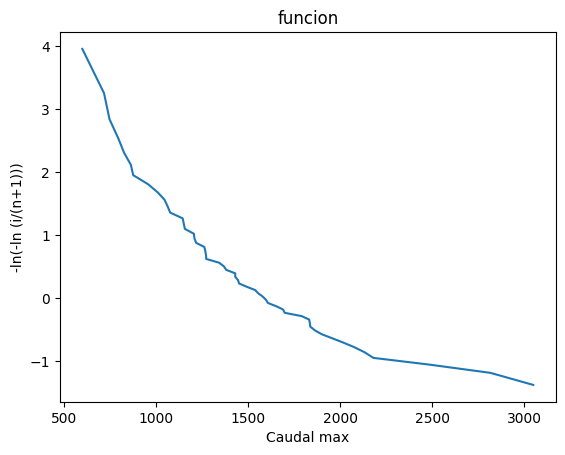

In [858]:
plt.plot(datos_organizados2,f)
plt.ylabel('-ln(-ln (i/(n+1)))')
plt.xlabel('Caudal max')
plt.title(f'funcion')
plt.show()

5. Determine los parámetros de la distribución Gumbel con el método de momentos. Estima la inundación de 
1000 años y sus límites de confianza del 95%.

Recordando la funcion de probabilidad de Gumbel:
$$
F(x)=\exp(-\exp(-\frac{x-\mu}{\beta}))
$$
donde
$$
\beta=(\sqrt[2]{6}s)/\pi { ; } \mu= \bar{x}-0.57772*\beta
$$

se tiene que:

In [859]:
x.std()

507.1209838960446

In [860]:
x.mean()

1475.0

In [861]:
beta1=6**0.5*x.std()/np.pi
beta1

395.40060898222055

In [862]:
mu1=x.mean()-0.5772*beta
mu1

1228.4920886523655

para un periodo de retorno de 1000 años tenemos:

In [863]:
T=1000
yt=-np.log(np.log(T/(T-1)))
yt

6.907255070523628

In [864]:
xt=mu1+(beta1*yt)
xt

3959.6249499329388

el caudal de retorno de 1000 años es de $3959.6m^3/s$

6. Estima la inundación de 1000 años asumiendo una distribución lognormal de los valores máximos.

la funcion acumulada de distribucion lognormal es:
$$
F(x)=\phi*(\frac{lnx-\mu}{\sigma})
$$
que es igual a:
$$
\frac{1}{2}*(1+erf(\frac{lnx-\mu}{\sigma\sqrt{2}}) = \frac{1}{2}erfc(-\frac{lnx-\mu}{\sigma\sqrt2}))
$$

con $\mu =\bar y$ y $y=logx$

$\sigma_y=s_y$

In [865]:
np.log(x)
ymedia=np.log(x).mean()
ymedia

7.23817310398867

In [866]:
ys=np.log(x).std()
ys

0.34466413320373357

In [867]:
def lognormal(x):
    y=np.log(x)
    ylognormal=1/2*(special.erfc(-(y-ymedia)/(ys*2**0.5)))
    return ylognormal

In [868]:
puntos=np.arange(500,5000,1)

In [869]:
ylog=lognormal(puntos)

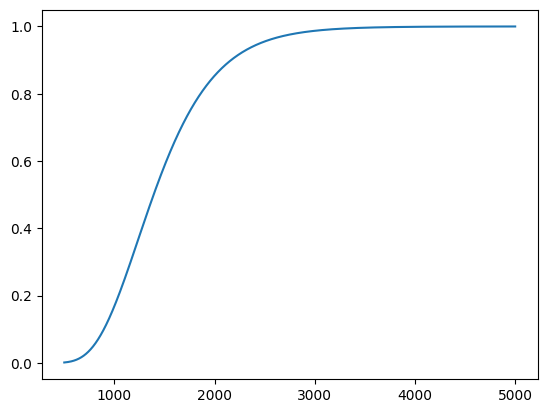

In [870]:
plt.plot(puntos,ylog)

In [871]:
ylog

array([0.00149023, 0.00151859, 0.00154739, ..., 0.99989603, 0.99989627,
       0.99989651])

teniendo en cuenta que F(estimado)=$\frac{T-1}{T}$
entonces:

In [872]:
T1=1000
f_estimado=(T1-1)/T1
f_estimado

0.999

In [873]:
valor_mas_cercano = min(ylog, key=lambda x: abs(x - 0.999))

print("El valor más cercano a 0.999 es:", valor_mas_cercano)

El valor más cercano a 0.999 es: 0.9989999196714288


In [874]:
ylog==0.9989999196714288

array([False, False, False, ..., False, False, False])

In [875]:
puntos[ylog==0.9989999196714288]

array([4037])

por tanto con la probabilidad de 0.999 buscamos el caudal correspondiente el cual corresponde a $4037m^3/s$

9. Cuál es la probabilidad de que la inundación de 1000 anios ocurra al menos una vez en los proximos 40 
anios? 

Teniendo en cuenta que:
$$
P(X>=x_\tau \text { al menos una vez en N años} )=1-(1-\frac{1}{T})^N
$$


In [876]:
#para T=1000 y N=40
T=1000
N=40
Pxt40=1-(1-(1/T))**N
Pxt40

0.039229789264188186

la probabilidad que la inundacion de 1000 años se de en los proximos 40 años es de 4%

10. ¿Cuál es la probabilidad de que la inundación de 1000 años ocurra dos veces en los próximos 100 años? 

la probabilidad que la inundacion de 1000 años suceda al menos una vez en 100 años es:

In [877]:
T=1000
N=100
Pxt100=1-(1-(1/T))**N
Pxt100

0.09520785288629108

dado a que son eventos independientes la propabilidad total es el producto de las probabilidades por tanto:

In [878]:
#probabilidad que suceda al menos 2 veces en los proximos 100 años:
P2t100=Pxt100*Pxt100
P2t100

0.009064535251217644

la probabilidad que la inundacion de 1000 años suceda al menos 2 veces en las proximos 100 años es de aproximadamente 1%